LOADING DATA
Training data shape: (7352, 563)
Test data shape: (2947, 563)
Number of features: 561

Feature matrix shape: (7352, 561)
Number of activity classes: 6

Activity distribution in training set:
Activity
0    1407
1    1286
2    1374
3    1226
4     986
5    1073
Name: count, dtype: int64

FEATURE SCALING
✓ Features standardized (mean=0, std=1)

PCA: EXPLAINED VARIANCE ANALYSIS
Original number of features: 561

Components needed to explain:
  90% variance: 63 components
  95% variance: 102 components
  99% variance: 179 components


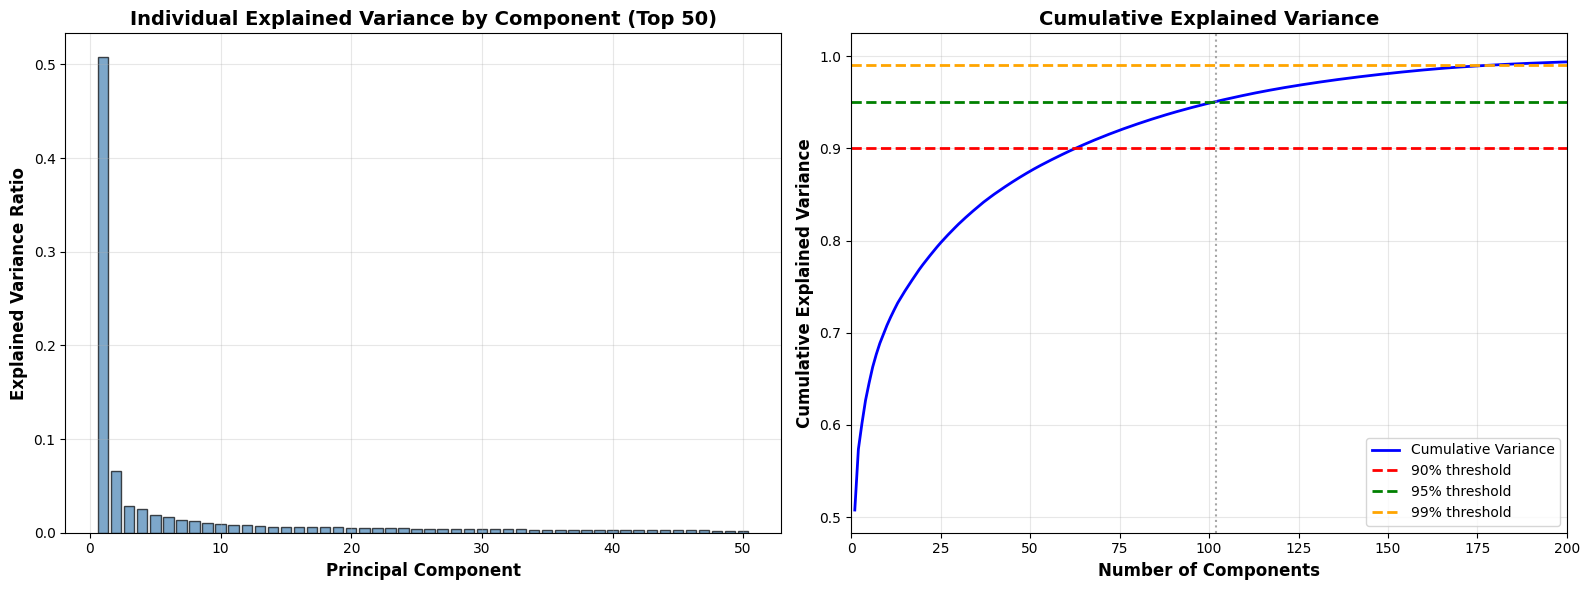


PCA TRANSFORMATION
Selected number of components: 102
Total variance explained: 0.9508
Dimensionality reduction: 561 → 102
Compression ratio: 81.82%

Transformed data shapes:
  Training: (7352, 102)
  Test: (2947, 102)

TOP PRINCIPAL COMPONENTS ANALYSIS

Top 5 components:
  PC1: 50.78% variance
       Top contributing features:
         - fBodyAcc-sma(): 0.0586
         - fBodyAccJerk-sma(): 0.0586
         - tBodyAccJerk-sma(): 0.0585
         - fBodyGyro-sma(): 0.0585
         - tBodyAccJerkMag-mean(): 0.0585
  PC2: 6.58% variance
       Top contributing features:
         - fBodyAcc-meanFreq()-Z: 0.1224
         - tBodyGyroMag-arCoeff()1: 0.1198
         - tGravityAccMag-arCoeff()1: 0.1182
         - tBodyAccMag-arCoeff()1: 0.1182
         - fBodyAccMag-meanFreq(): 0.1179
  PC3: 2.81% variance
       Top contributing features:
         - tGravityAcc-energy()-X: 0.1101
         - tGravityAcc-arCoeff()-X,1: 0.1099
         - tGravityAcc-entropy()-Y: -0.1096
         - tGravityAcc-ene

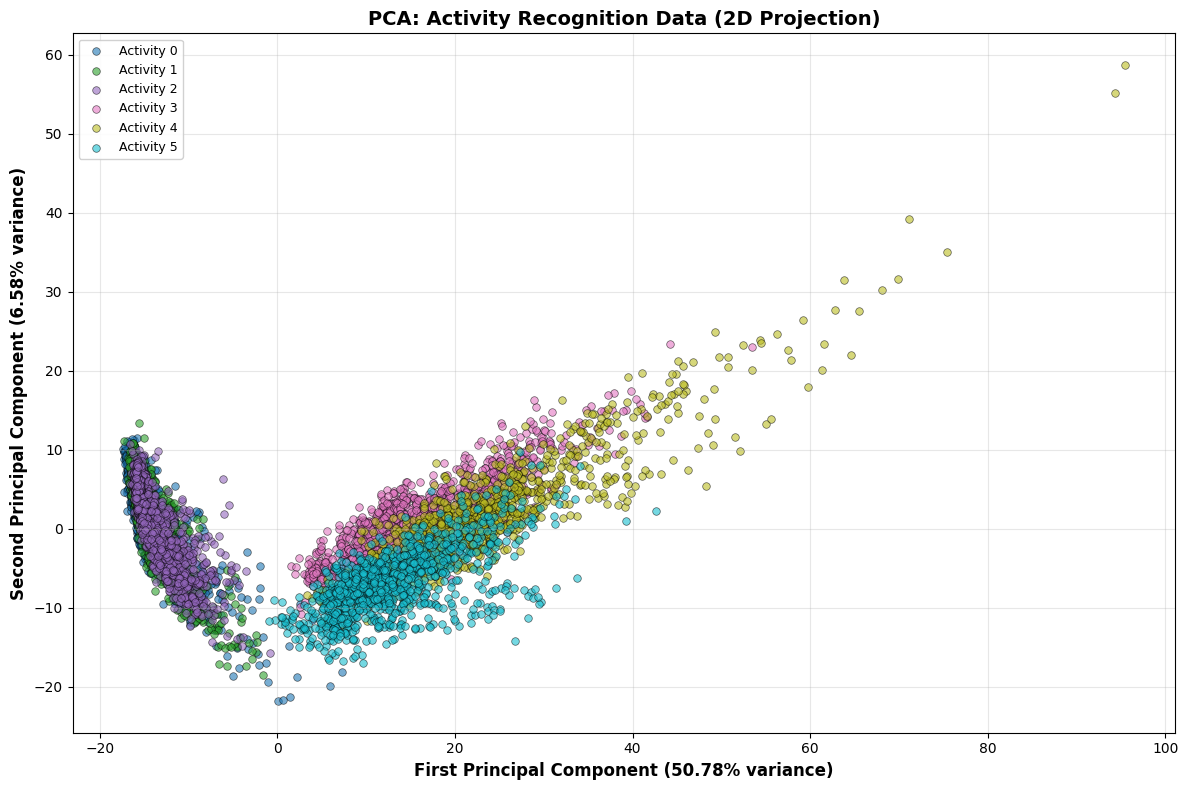


3D VISUALIZATION


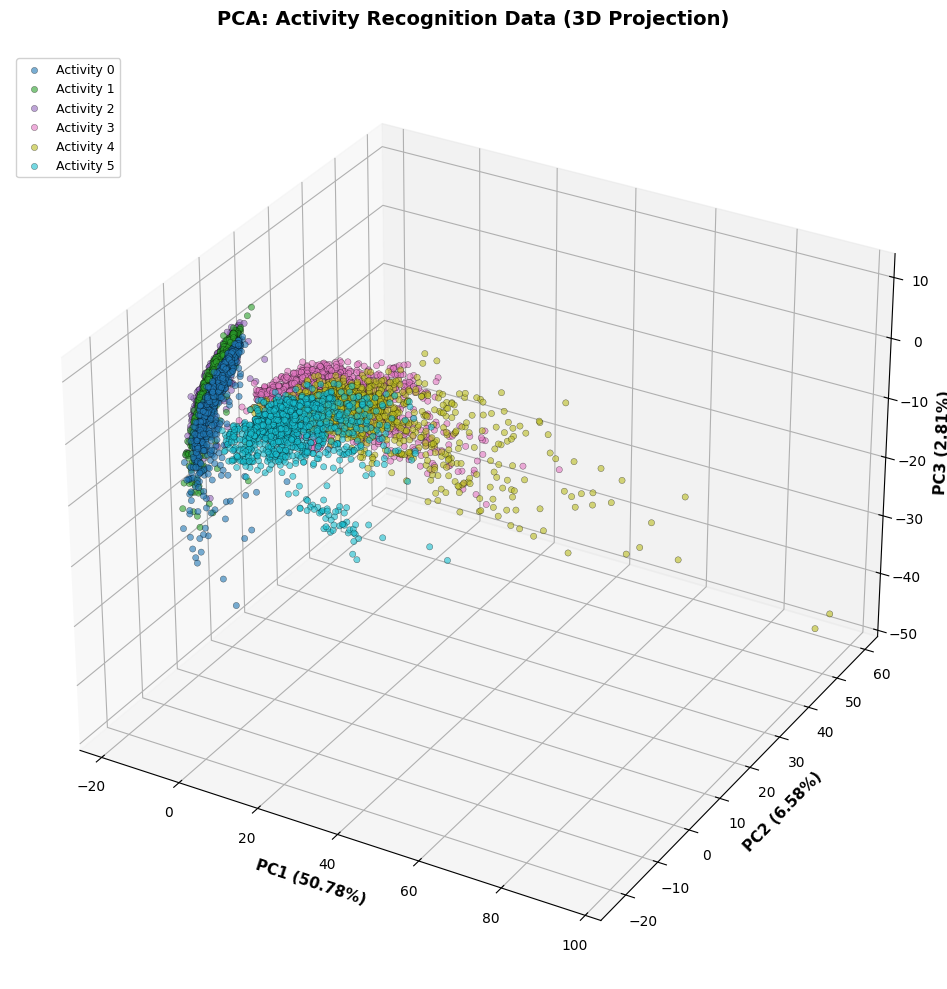


FEATURE LOADINGS ANALYSIS


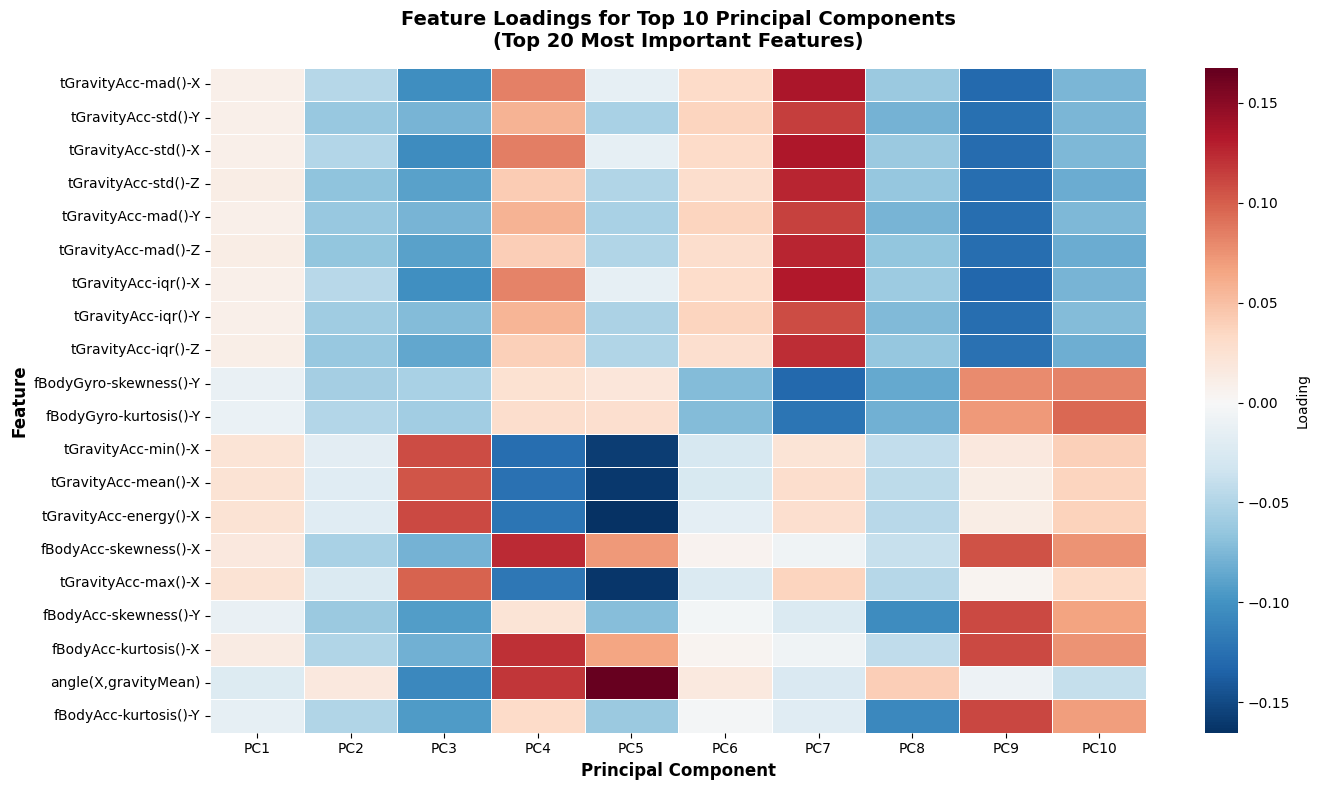

Top 10 most important features across all components:
   1. tGravityAcc-mad()-X: 0.6954
   2. tGravityAcc-std()-Y: 0.6952
   3. tGravityAcc-std()-X: 0.6939
   4. tGravityAcc-std()-Z: 0.6923
   5. tGravityAcc-mad()-Y: 0.6920
   6. tGravityAcc-mad()-Z: 0.6897
   7. tGravityAcc-iqr()-X: 0.6879
   8. tGravityAcc-iqr()-Y: 0.6713
   9. tGravityAcc-iqr()-Z: 0.6710
  10. fBodyGyro-skewness()-Y: 0.6174

SAVING PCA RESULTS
✓ PCA-transformed training data saved to: ../data/train_pca.csv
✓ PCA-transformed test data saved to: ../data/test_pca.csv

SUMMARY
Original dimensions: 561 features
Reduced dimensions: 102 principal components
Variance preserved: 95.08%
Dimensionality reduction: 81.82%

Data is ready for clustering analysis!


In [1]:
# **Principal Component Analysis (PCA)**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# ==================== Load Preprocessed Data ====================

print("="*70)
print("LOADING DATA")
print("="*70)

train_df = pd.read_csv('../data/cleaned_train.csv')
test_df = pd.read_csv('../data/cleaned_test.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print(f"Number of features: {train_df.shape[1] - 2}")

# ==================== Data Preparation ====================

X_train = train_df.drop(['subject', 'Activity'], axis=1)
y_train = train_df['Activity']

X_test = test_df.drop(['subject', 'Activity'], axis=1)
y_test = test_df['Activity']

print(f"\nFeature matrix shape: {X_train.shape}")
print(f"Number of activity classes: {y_train.nunique()}")
print(f"\nActivity distribution in training set:")
print(y_train.value_counts().sort_index())

# ==================== Feature Scaling ====================

print("\n" + "="*70)
print("FEATURE SCALING")
print("="*70)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features standardized (mean=0, std=1)")

# ==================== PCA: Explained Variance Analysis ====================

print("\n" + "="*70)
print("PCA: EXPLAINED VARIANCE ANALYSIS")
print("="*70)

# Fit PCA with all components
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Calculate cumulative explained variance
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find number of components for different variance thresholds
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
n_components_99 = np.argmax(cumulative_variance_ratio >= 0.99) + 1

print(f"Original number of features: {X_train.shape[1]}")
print(f"\nComponents needed to explain:")
print(f"  90% variance: {n_components_90} components")
print(f"  95% variance: {n_components_95} components")
print(f"  99% variance: {n_components_99} components")

# ==================== Visualization: Explained Variance ====================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Individual explained variance
axes[0].bar(range(1, min(51, len(explained_variance_ratio) + 1)), 
            explained_variance_ratio[:50], 
            alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Principal Component', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12, fontweight='bold')
axes[0].set_title('Individual Explained Variance by Component (Top 50)', 
                  fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance_ratio) + 1), 
             cumulative_variance_ratio, 
             'b-', linewidth=2, label='Cumulative Variance')
axes[1].axhline(y=0.90, color='r', linestyle='--', linewidth=2, label='90% threshold')
axes[1].axhline(y=0.95, color='g', linestyle='--', linewidth=2, label='95% threshold')
axes[1].axhline(y=0.99, color='orange', linestyle='--', linewidth=2, label='99% threshold')
axes[1].axvline(x=n_components_95, color='gray', linestyle=':', alpha=0.7)
axes[1].set_xlabel('Number of Components', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12, fontweight='bold')
axes[1].set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right', fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([0, min(200, len(cumulative_variance_ratio))])

plt.tight_layout()
plt.show()

# ==================== PCA Transformation (95% variance) ====================

print("\n" + "="*70)
print("PCA TRANSFORMATION")
print("="*70)

# Apply PCA with optimal number of components
n_components_optimal = n_components_95
pca = PCA(n_components=n_components_optimal)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Selected number of components: {n_components_optimal}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.4f}")
print(f"Dimensionality reduction: {X_train.shape[1]} → {X_train_pca.shape[1]}")
print(f"Compression ratio: {(1 - n_components_optimal/X_train.shape[1])*100:.2f}%")

print(f"\nTransformed data shapes:")
print(f"  Training: {X_train_pca.shape}")
print(f"  Test: {X_test_pca.shape}")

# ==================== Component Analysis ====================

print("\n" + "="*70)
print("TOP PRINCIPAL COMPONENTS ANALYSIS")
print("="*70)

# Analyze top 5 components
n_top_components = min(5, n_components_optimal)
print(f"\nTop {n_top_components} components:")
for i in range(n_top_components):
    print(f"  PC{i+1}: {pca.explained_variance_ratio_[i]*100:.2f}% variance")
    
    # Find features with highest absolute loading
    loadings = pca.components_[i]
    top_features_idx = np.argsort(np.abs(loadings))[-5:][::-1]
    
    print(f"       Top contributing features:")
    for idx in top_features_idx:
        print(f"         - {X_train.columns[idx]}: {loadings[idx]:.4f}")

# ==================== 2D Visualization ====================

print("\n" + "="*70)
print("2D VISUALIZATION")
print("="*70)

fig, ax = plt.subplots(figsize=(12, 8))

# Create color map for activities
unique_activities = sorted(y_train.unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_activities)))

for activity, color in zip(unique_activities, colors):
    mask = y_train == activity
    ax.scatter(X_train_pca[mask, 0], 
               X_train_pca[mask, 1],
               c=[color], 
               label=f'Activity {activity}',
               alpha=0.6, 
               s=30,
               edgecolors='black',
               linewidth=0.5)

ax.set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]*100:.2f}% variance)', 
              fontsize=12, fontweight='bold')
ax.set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]*100:.2f}% variance)', 
              fontsize=12, fontweight='bold')
ax.set_title('PCA: Activity Recognition Data (2D Projection)', 
             fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=9, framealpha=0.9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==================== 3D Visualization ====================

print("\n" + "="*70)
print("3D VISUALIZATION")
print("="*70)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

for activity, color in zip(unique_activities, colors):
    mask = y_train == activity
    ax.scatter(X_train_pca[mask, 0],
               X_train_pca[mask, 1],
               X_train_pca[mask, 2],
               c=[color],
               label=f'Activity {activity}',
               alpha=0.6,
               s=20,
               edgecolors='black',
               linewidth=0.3)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', 
              fontsize=11, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', 
              fontsize=11, fontweight='bold')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)', 
              fontsize=11, fontweight='bold')
ax.set_title('PCA: Activity Recognition Data (3D Projection)', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=9, framealpha=0.9)

plt.tight_layout()
plt.show()

# ==================== Feature Loadings Heatmap ====================

print("\n" + "="*70)
print("FEATURE LOADINGS ANALYSIS")
print("="*70)

# Create loadings DataFrame for top components
n_display = min(10, n_components_optimal)
loadings_df = pd.DataFrame(
    pca.components_[:n_display],
    columns=X_train.columns,
    index=[f'PC{i+1}' for i in range(n_display)]
)

# Find top features by absolute loading across all components
feature_importance = np.abs(loadings_df).sum(axis=0).sort_values(ascending=False)
top_features = feature_importance.head(20).index

plt.figure(figsize=(14, 8))
sns.heatmap(loadings_df[top_features].T, 
            cmap='RdBu_r', 
            center=0,
            annot=False,
            cbar_kws={'label': 'Loading'},
            linewidths=0.5)
plt.title(f'Feature Loadings for Top {n_display} Principal Components\n(Top 20 Most Important Features)', 
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Principal Component', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Top 10 most important features across all components:")
for i, (feature, importance) in enumerate(feature_importance.head(10).items(), 1):
    print(f"  {i:2d}. {feature}: {importance:.4f}")

# ==================== Save PCA Results ====================

print("\n" + "="*70)
print("SAVING PCA RESULTS")
print("="*70)

# Create DataFrames with PCA-transformed data
train_pca_df = pd.DataFrame(
    X_train_pca,
    columns=[f'PC{i+1}' for i in range(n_components_optimal)]
)
train_pca_df['Activity'] = y_train.values
train_pca_df['subject'] = train_df['subject'].values

test_pca_df = pd.DataFrame(
    X_test_pca,
    columns=[f'PC{i+1}' for i in range(n_components_optimal)]
)
test_pca_df['Activity'] = y_test.values
test_pca_df['subject'] = test_df['subject'].values

# Save to CSV
train_pca_df.to_csv('../data/train_pca.csv', index=False)
test_pca_df.to_csv('../data/test_pca.csv', index=False)

print(f"✓ PCA-transformed training data saved to: ../data/train_pca.csv")
print(f"✓ PCA-transformed test data saved to: ../data/test_pca.csv")

# ==================== Summary Statistics ====================

print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"Original dimensions: {X_train.shape[1]} features")
print(f"Reduced dimensions: {n_components_optimal} principal components")
print(f"Variance preserved: {pca.explained_variance_ratio_.sum()*100:.2f}%")
print(f"Dimensionality reduction: {(1 - n_components_optimal/X_train.shape[1])*100:.2f}%")
print(f"\nData is ready for clustering analysis!")
print("="*70)